In [2]:
import numpy as np
import pandas as pd

In [3]:
indicator = pd.read_csv("Preprocess Data\问题1-1.csv",encoding='gb18030')
label_1 = indicator.iloc[:,1:3]
label_2 = indicator.iloc[:,3:7]
label_3 = indicator.iloc[:,7:]
indicator

,年份,旅游收入/亿,旅游人次/万人,自然保护区面积(万公顷),森林病虫鼠害防治率(%),森林覆盖率(%),水土流失治理面积,降水量,地表水供水总量(亿立方米),空气质量优良天数
0,2000,21.50,623.3,9.5,97.0,22.3,5328.3,5647.9,34.0,169.0
1,2001,20.10,555.0,18.9,94.5,22.3,5485.6,4943.3,34.9,183.5
2,2002,18.70,486.7,28.3,92.0,22.3,5642.9,9679.4,35.8,198.0
3,2003,17.30,418.4,37.7,89.5,22.3,5791.7,13328.0,36.7,212.5
4,2004,23.30,552.0,47.1,87.0,22.3,5876.5,11897.0,37.6,227.0
5,2005,31.50,671.8,56.5,84.5,22.3,5981.2,11798.0,38.5,256.0
6,2006,40.50,777.6,59.7,81.0,22.3,6076.2,10346.0,38.7,277.0
7,2007,47.20,823.1,56.6,90.8,22.3,6133.7,11710.0,38.9,306.0
8,2008,50.60,754.6,56.7,95.8,22.3,6194.0,12632.0,37.8,320.0
9,2009,72.20,1080.9,57.2,100.0,23.4,6230.7,11604.0,37.5,334.0


# 熵权法

In [4]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler

#定义熵值法函数
def cal_weight(x):
    # 标准化
    x = MinMaxScaler().fit_transform(x)
    # 求k
    rows,cols = x.shape
    k = 1.0 / math.log(rows)
    lnf = [[None] * cols for i in range(rows)]
    x = np.array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = np.array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
 
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
    # 计算各样本的综合得分,用最原始的数据
    
    w = pd.DataFrame(w)
    return w

In [5]:
w_1 = cal_weight(label_1)  # 调用cal_weight
w_2 = cal_weight(label_2) 
w_3 = cal_weight(label_3) 
w_1.index = label_1.columns
w_2.index = label_2.columns
w_3.index = label_3.columns
w_1.columns = ['weight']
w_2.columns = ['weight']
w_3.columns = ['weight']

In [6]:
w_1

,weight
旅游收入/亿,0.557485
旅游人次/万人,0.442515


In [7]:
w_2

,weight
自然保护区面积(万公顷),0.089704
森林病虫鼠害防治率(%),0.165924
森林覆盖率(%),0.620751
水土流失治理面积,0.123621


In [8]:
w_3

,weight
降水量,0.128616
地表水供水总量(亿立方米),0.686432
空气质量优良天数,0.184952


# 层次分析法

In [9]:
import numpy as np
class AHP:
    #传入的np.ndarray是的判断矩阵
    def __init__(self,array):
        self.array = array
        # 记录矩阵大小
        self.n = array.shape[0]
        # 初始化RI值,用于一致性检验 
        RI_list = [0,0,0.58,0.90,1.12,1.24,1.32,1.41,1.45]
        self.RI = RI_list[self.n-1]
        
    #获取最大特征值和对应的特征向量
    def get_eig(self):
        #numpy.linalg.eig() 计算矩阵特征值与特征向量
        eig_val ,eig_vector = np.linalg.eig(self.array)
        #获取最大特征值
        max_val = np.max(eig_val)
        max_val = round(max_val.real, 4)
        #通过位置来确定最大特征值对应的特征向量
        index = np.argmax(eig_val)
        max_vector = eig_vector[:,index]
        max_vector = max_vector.real.round(4) 
        #添加最大特征值属性
        self.max_val = max_val
        #计算权重向量W
        weight_vector = max_vector/sum(max_vector)
        weight_vector = weight_vector.round(4)
        #打印结果
        print("最大的特征值: "+str(max_val))
        print("对应的特征向量为: "+str(max_vector))
        print("归一化后得到权重向量: "+str(weight_vector))
        return weight_vector
    
    #测试一致性
    def test_consitst(self):
        #计算CI值
        CI = (self.max_val-self.n)/(self.n-1) 
        CI = round(CI,4) 
        #打印结果
        print("判断矩阵的CI值为" +str(CI))
        print("判断矩阵的RI值为" +str(self.RI))
        #分类讨论
        if self.n == 2:
            print("仅包含两个子因素，不存在一致性问题")
        else:
            #计算CR值
            CR = CI/self.RI 
            CR = round(CR,4)
            #CR < 0.10才能通过检验
            if  CR < 0.10 :
                print("判断矩阵的CR值为" +str(CR) + "，通过一致性检验")
                return True
            else:
                print("判断矩阵的CR值为" +str(CR) + "，未通过一致性检验")
                return False

1. 指标1：$\begin{bmatrix} 1 & \frac{1}{3} \\ 3 & 1 \end{bmatrix}$
2. 指标2：$\begin{bmatrix} 1  &  3  & \frac{1}{3} & \frac{1}{5}\\ \frac{1}{3}  & 1 & \frac{1}{5}  &  \frac{1}{7} \\ 3 & 5 &  1& \frac{1}{3}\\ 5 & 7 &  3 &1 \end{bmatrix}$
3. 指标3：$\begin{bmatrix} 1 & 3 & 1\\ \frac{1}{3}  & 1 & \frac{1}{3}\\ 1 &  3 & 1 \end{bmatrix} $

In [10]:
# 构造成对比较矩阵
A = np.array([[1, 1/3],
              [3, 1]])
B = np.array([[1, 3, 1/3, 1/5],
              [1/3, 1, 1/5, 1/7],
              [3, 5, 1, 1/3],
              [5, 7, 3, 1]])
C = np.array([[1, 3, 1],
              [1/3, 1, 1/3],
              [1, 3, 1]])

In [11]:
model = AHP(A)
model.get_eig()
model.test_consitst()

最大的特征值: 2.0
对应的特征向量为: [0.3162 0.9487]
归一化后得到权重向量: [0.25 0.75]
判断矩阵的CI值为0.0
判断矩阵的RI值为0
仅包含两个子因素，不存在一致性问题


In [12]:
model= AHP(B)
model.get_eig()
model.test_consitst()

最大的特征值: 4.117
对应的特征向量为: [0.1847 0.0869 0.4121 0.888 ]
归一化后得到权重向量: [0.1175 0.0553 0.2622 0.565 ]
判断矩阵的CI值为0.039
判断矩阵的RI值为0.9
判断矩阵的CR值为0.0433，通过一致性检验


True

In [13]:
model_1 = AHP(C)
model_1.get_eig()
model_1.test_consitst()

最大的特征值: 3.0
对应的特征向量为: [0.6882 0.2294 0.6882]
归一化后得到权重向量: [0.4286 0.1429 0.4286]
判断矩阵的CI值为0.0
判断矩阵的RI值为0.58
判断矩阵的CR值为0.0，通过一致性检验


True

# 主客观权重组合

In [14]:
# 客观-熵权法
w1 = [0.557485,0.442515]
w2 = [0.089704,0.165924,0.620751,0.123621]
w3 = [0.128616,0.686432,0.184952]
# 主观-层次分析法
W1 = [0.25, 0.75]
W2 = [0.1175, 0.0553, 0.2622, 0.565]
W3 = [0.4286, 0.1429, 0.4286]

- 组合权重（乘法组合）
$ W_{j}=\frac{\sqrt{\alpha_{j} \beta_{j}}}{\sum_{j=1}^{n} \sqrt{\alpha_{j} \beta_{j}}}$

In [15]:
def combine_weight(a,b):
    a, b = np.array(a),np.array(b)
    return np.sqrt(a*b)/np.sqrt(a*b).sum()

In [16]:
CW1 = combine_weight(w1,W1)
CW2 = combine_weight(w2,W2)
CW3 = combine_weight(w3,W3)
print(CW1)
print(CW2)
print(CW3)

[0.3932132 0.6067868]
[0.11852752 0.1105889  0.46576776 0.30511581]
[0.28303525 0.37755638 0.33940837]


# 计算三个一级权重

In [86]:
indicator = pd.read_csv("Preprocess Data\问题1-1.csv",encoding='gb18030').iloc[:,1:]
indicator = MinMaxScaler().fit_transform(indicator)
label_1 = indicator[:,:2]
label_2 = indicator[:,2:6]
label_3 = indicator[:,6:]

In [87]:
label_1 = (label_1*CW1).sum(axis=1).reshape(-1,1)
label_2 = (label_2*CW2).sum(axis=1).reshape(-1,1)
label_3 = (label_3*CW3).sum(axis=1).reshape(-1,1)
label_data = np.hstack((label_1,label_2,label_3))

In [88]:
# 变异系数
def CV(x):
    return np.std(x,axis=0)/np.mean(x,axis=0)

label_cv = CV(label_data)
FCI = label_cv/np.sum(label_cv)
FCI

array([0.59884733, 0.19949965, 0.20165301])

In [89]:
FCI_data = (FCI*label_data).sum(axis=1)*100
FCI_data

array([ 5.66126907,  6.268125  , 10.1750592 , 13.39249991, 14.40608662,
       16.86391829, 17.6579283 , 21.09084881, 22.51609966, 27.24276549,
       28.97558315, 32.1099828 , 33.49766214, 27.25555621, 39.22634479,
       45.73507535, 56.17830167, 68.44547955, 80.19527562, 91.61705326,
       50.62799875])

In [84]:
import matplotlib.pyplot as plt

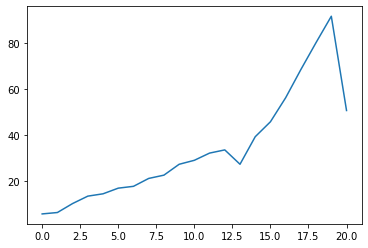

In [85]:
plt.plot(FCI_data)